<img src="http://chdoig.github.io/scipy2015-blaze-bokeh/images/bokeh.png"
     align="right"
     width="30%"
     alt="Python Visualization Libraries">
# Visualizations
There were at least 3 tributes to **[Hans Rosling](https://www.ted.com/speakers/hans_rosling)**
* From Bloomberg teams [bqPlot](https://www.youtube.com/watch?v=MJsN2DZl_l0&list=PLGVZCDnMOq0rxoq9Nx0B4tqtr891vaCn7&index=22)
* And during UW's Jeffrey Heer [Interactive Data Analysis: Visualization and Beyond Keynote](https://www.youtube.com/watch?v=hsfWtPH2kDg)
* And also by [Bokeh & friends](https://www.youtube.com/watch?v=ayp5WELL6fM&list=PLGVZCDnMOq0rxoq9Nx0B4tqtr891vaCn7&index=7)

## Pandas & Seaborn
Stephen Elston presented [Exploring Data with Python](https://www.youtube.com/watch?v=KvZ2KSxlWBY&list=PLGVZCDnMOq0rxoq9Nx0B4tqtr891vaCn7&index=8) using [pandas](http://pandas.pydata.org/pandas-docs/version/0.18.0/visualization.html) and [seaborn](http://seaborn.pydata.org/) visualization libraries. What's nice about these python libraries is that not many lines of code are required to create compelling visualizations.

### First, load data again, but subset this time
Can use [Pandas](http://pandas.pydata.org/) or [Dask](https://dask.pydata.org/en/latest/) so we'll start with Dask and then convert to Pandas for fun!

In [15]:
# !pip3 install bokeh matplotlib seaborn

In [1]:
trans_file = 'data/transactions.csv'
data_types = {'type': str,
            'type_description': str,
            'federal_action_obligation': float,
            'description': str,
            'award': str,
            'fiscal_year': int,
            'recipient_legal_entity_id': str,
            'recipient_recipient_name': str,
            'recipient_business_types_description': str,
            'recipient_city_local_government': str,
            'recipient_county_local_government': str,
            'recipient_inter_municipal_local_government': str,
            'recipient_local_government_owned': str,
            'recipient_municipality_local_government': str,
            'recipient_school_district_local_government': str,
            'recipient_township_local_government': str,
            'recipient_us_state_government': str,
            'recipient_us_federal_government': str,
            'recipient_federal_agency': str,
            'recipient_federally_funded_research_and_development_corp': str,
            'recipient_us_tribal_government': str,
            'recipient_foreign_government': str,
            'recipient_private_university_or_college': str,
            'recipient_educational_institution': str,
            'recipient_contracts': str,
            'recipient_grants': str,
            'recipient_receives_contracts_and_grants': str,
            'recipient_location_location_id': str,
            'recipient_location_country_name': str,
            'recipient_location_state_code': str,
            'recipient_location_state_name': str,
            'recipient_location_state_description': str,
            'recipient_location_city_name': str,
            'recipient_location_city_code': str,
            'recipient_location_county_name': str,
            'recipient_location_county_code': str,
            'recipient_location_congressional_code': str,
            'recipient_location_zip5': str,
            'recipient_location_location_country_code': str,
            'place_of_performance_location_id': str,
            'place_of_performance_country_name': str,
            'place_of_performance_state_code': str,
            'place_of_performance_state_name': str,
            'place_of_performance_state_description': str,
            'place_of_performance_city_name': str,
            'place_of_performance_county_name': str,
            'place_of_performance_county_code': str,
            'place_of_performance_congressional_code': str,
            'place_of_performance_zip5': str,
            'place_of_performance_location_country_code': str,
            'assistance_data_fain': str,
            'assistance_data_uri': str,
            'assistance_data_cfda_number': str,
            'assistance_data_cfda_title': str,
            'assistance_data_non_federal_funding_amount': str,
            'assistance_data_total_funding_amount': str,
            'assistance_data_face_value_loan_guarantee': str,
            'assistance_data_original_loan_subsidy_cost': str,
            'assistance_data_reporting_period_start': str,
            'assistance_data_reporting_period_end': str,
            'assistance_data_period_of_performance_start_date': str,
            'assistance_data_period_of_performance_current_end_date': str,
            'assistance_data_cfda_program_number': str,
            'assistance_data_cfda_program_title': str,
            'assistance_data_cfda_federal_agency': str,
            'assistance_data_cfda_url': str,
            'contract_data_piid': str,
            'contract_data_naics_description': str
           }
trans_cols = ['type','type_description','federal_action_obligation','description','award','fiscal_year',
            'recipient_legal_entity_id','recipient_recipient_name','recipient_business_types_description',
            'recipient_city_local_government','recipient_county_local_government','recipient_inter_municipal_local_government',
            'recipient_local_government_owned','recipient_municipality_local_government','recipient_school_district_local_government','recipient_township_local_government',
            'recipient_us_state_government','recipient_us_federal_government','recipient_federal_agency','recipient_federally_funded_research_and_development_corp',
            'recipient_us_tribal_government','recipient_foreign_government','recipient_private_university_or_college',
            'recipient_educational_institution',
            'recipient_contracts','recipient_grants','recipient_receives_contracts_and_grants',
            'recipient_location_location_id','recipient_location_country_name','recipient_location_state_code',
            'recipient_location_state_name','recipient_location_state_description',
            'recipient_location_city_name','recipient_location_city_code','recipient_location_county_name','recipient_location_county_code',
            'recipient_location_congressional_code','recipient_location_zip5','recipient_location_location_country_code',
            'place_of_performance_location_id','place_of_performance_country_name','place_of_performance_state_code',
            'place_of_performance_state_name','place_of_performance_state_description','place_of_performance_city_name',
            'place_of_performance_county_name','place_of_performance_county_code','place_of_performance_congressional_code',
            'place_of_performance_zip5','place_of_performance_location_country_code',
            'assistance_data_fain','assistance_data_uri','assistance_data_cfda_number','assistance_data_cfda_title',
            'assistance_data_non_federal_funding_amount','assistance_data_total_funding_amount','assistance_data_face_value_loan_guarantee',
            'assistance_data_original_loan_subsidy_cost','assistance_data_reporting_period_start','assistance_data_reporting_period_end',
            'assistance_data_period_of_performance_start_date','assistance_data_period_of_performance_current_end_date',
            'assistance_data_cfda_program_number','assistance_data_cfda_program_title','assistance_data_cfda_federal_agency',
            'assistance_data_cfda_url','contract_data_piid','contract_data_naics_description']

In [2]:
import dask.dataframe as dd
import pandas as pd
import numpy as np
df = dd.read_csv(trans_file, dtype=data_types, usecols=trans_cols)

In [3]:
# convert Dask dataframe to Pandas dataframe
pdf = df.compute()
pdf.head()

,type,type_description,federal_action_obligation,description,award,fiscal_year,recipient_legal_entity_id,recipient_recipient_name,recipient_business_types_description,recipient_city_local_government,...,assistance_data_reporting_period_start,assistance_data_reporting_period_end,assistance_data_period_of_performance_start_date,assistance_data_period_of_performance_current_end_date,assistance_data_cfda_program_number,assistance_data_cfda_program_title,assistance_data_cfda_federal_agency,assistance_data_cfda_url,contract_data_piid,contract_data_naics_description
0,06,Direct Payment for Specified Use,-35857.0,UNKNOWN TITLE,870652,2017,671891,School Board Pinellas County,County Government,NaN,...,NaN,NaN,NaN,NaN,84.063,Federal Pell Grant Program,NaN,NaN,NaN,NaN
1,06,Direct Payment for Specified Use,1689.0,UNKNOWN TITLE,879565,2017,645335,"AMERICAN COLLEGE OF HEALTHCARE SCIENCES, INC.",Private Institution of Higher Education,NaN,...,NaN,NaN,NaN,NaN,84.063,Federal Pell Grant Program,NaN,NaN,NaN,NaN
2,08,Guaranteed/Insured Loan,0.0,7(A) EXPORT LOAN GUARANTEES,1123427,2017,820841,"THE PRODUCE CONNECTION, INC.",Small Business,NaN,...,NaN,NaN,NaN,NaN,59.054,7(a)Export Loan Guarantees,NaN,NaN,NaN,NaN
3,07,Direct Loan,NaN,UNKNOWN TITLE,874459,2017,645809,"CAPPS COLLEGE, INC.",Private Institution of Higher Education,NaN,...,NaN,NaN,NaN,NaN,84.268,Federal Direct Student Loans,NaN,NaN,NaN,NaN
4,11,Other Financial Assistance,26744.0,NaN,254702,2017,214805,MULTIPLE RECIPIENTS,Other,NaN,...,NaN,NaN,NaN,NaN,64.040,VHA Inpatient Medicine,NaN,NaN,NaN,NaN


# Matplotlib
### Create counts by Award Type to see number of award per type
Note that you must set %matplotlib inline to render plots in notebooks.

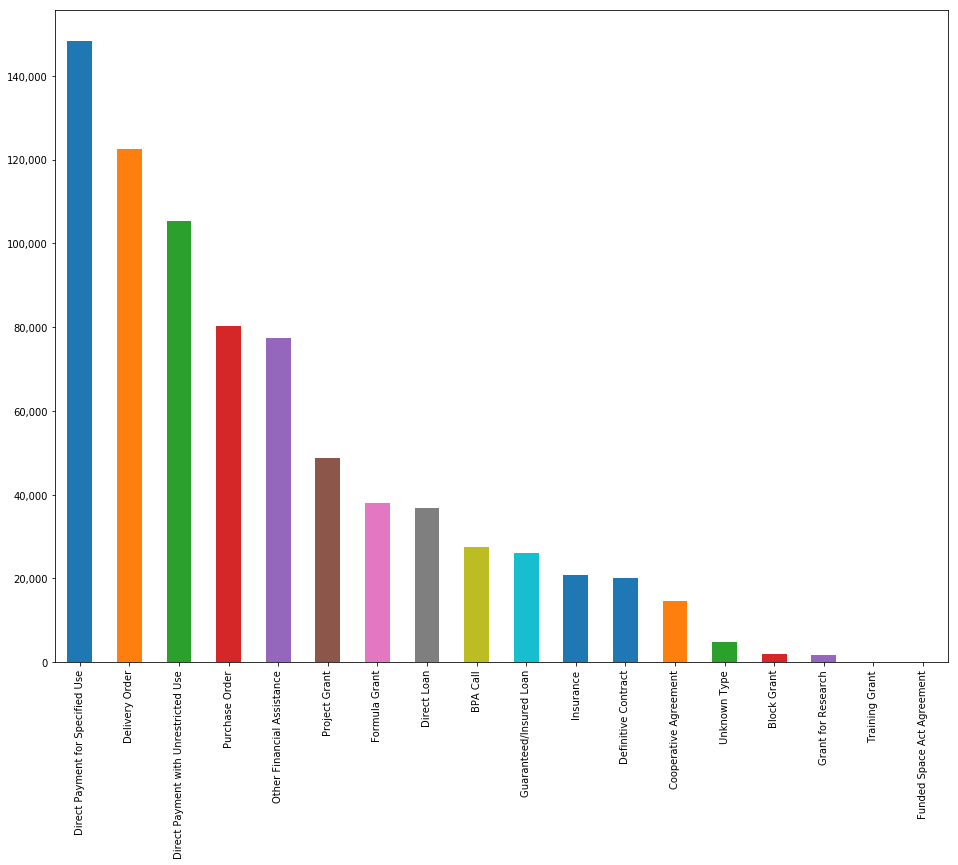

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.ticker

# find the counts for each unique type of Contract Award
counts = pdf['type_description'].value_counts()

# define plot area
fig = plt.figure(figsize=(16,12))

# define axis
ax = fig.gca()
counts.plot.bar(ax = ax) 
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda y, p: format(int(y), ',')))

# Seaborn Library is nice
Let's dig deeper into Grant Awards by State and use [countplot](https://seaborn.pydata.org/generated/seaborn.countplot.html) to see how awards are distributed across the USA.

In [5]:
grants = pdf[pdf['type'].isin(['02','03','04','05'])].sort_values(by='place_of_performance_state_code')

# check that sort worked looking at first 10 records
grants.groupby(grants.place_of_performance_state_code).federal_action_obligation.sum().head(10)

place_of_performance_state_code
AK    4.588254e+07
AL    8.323904e+06
AR    4.034662e+06
AS    2.754515e+07
AZ    1.094554e+08
CA    1.535202e+08
CO    2.677621e+07
CT    2.975402e+06
DC    2.329358e+07
DE    6.403650e+05
Name: federal_action_obligation, dtype: float64

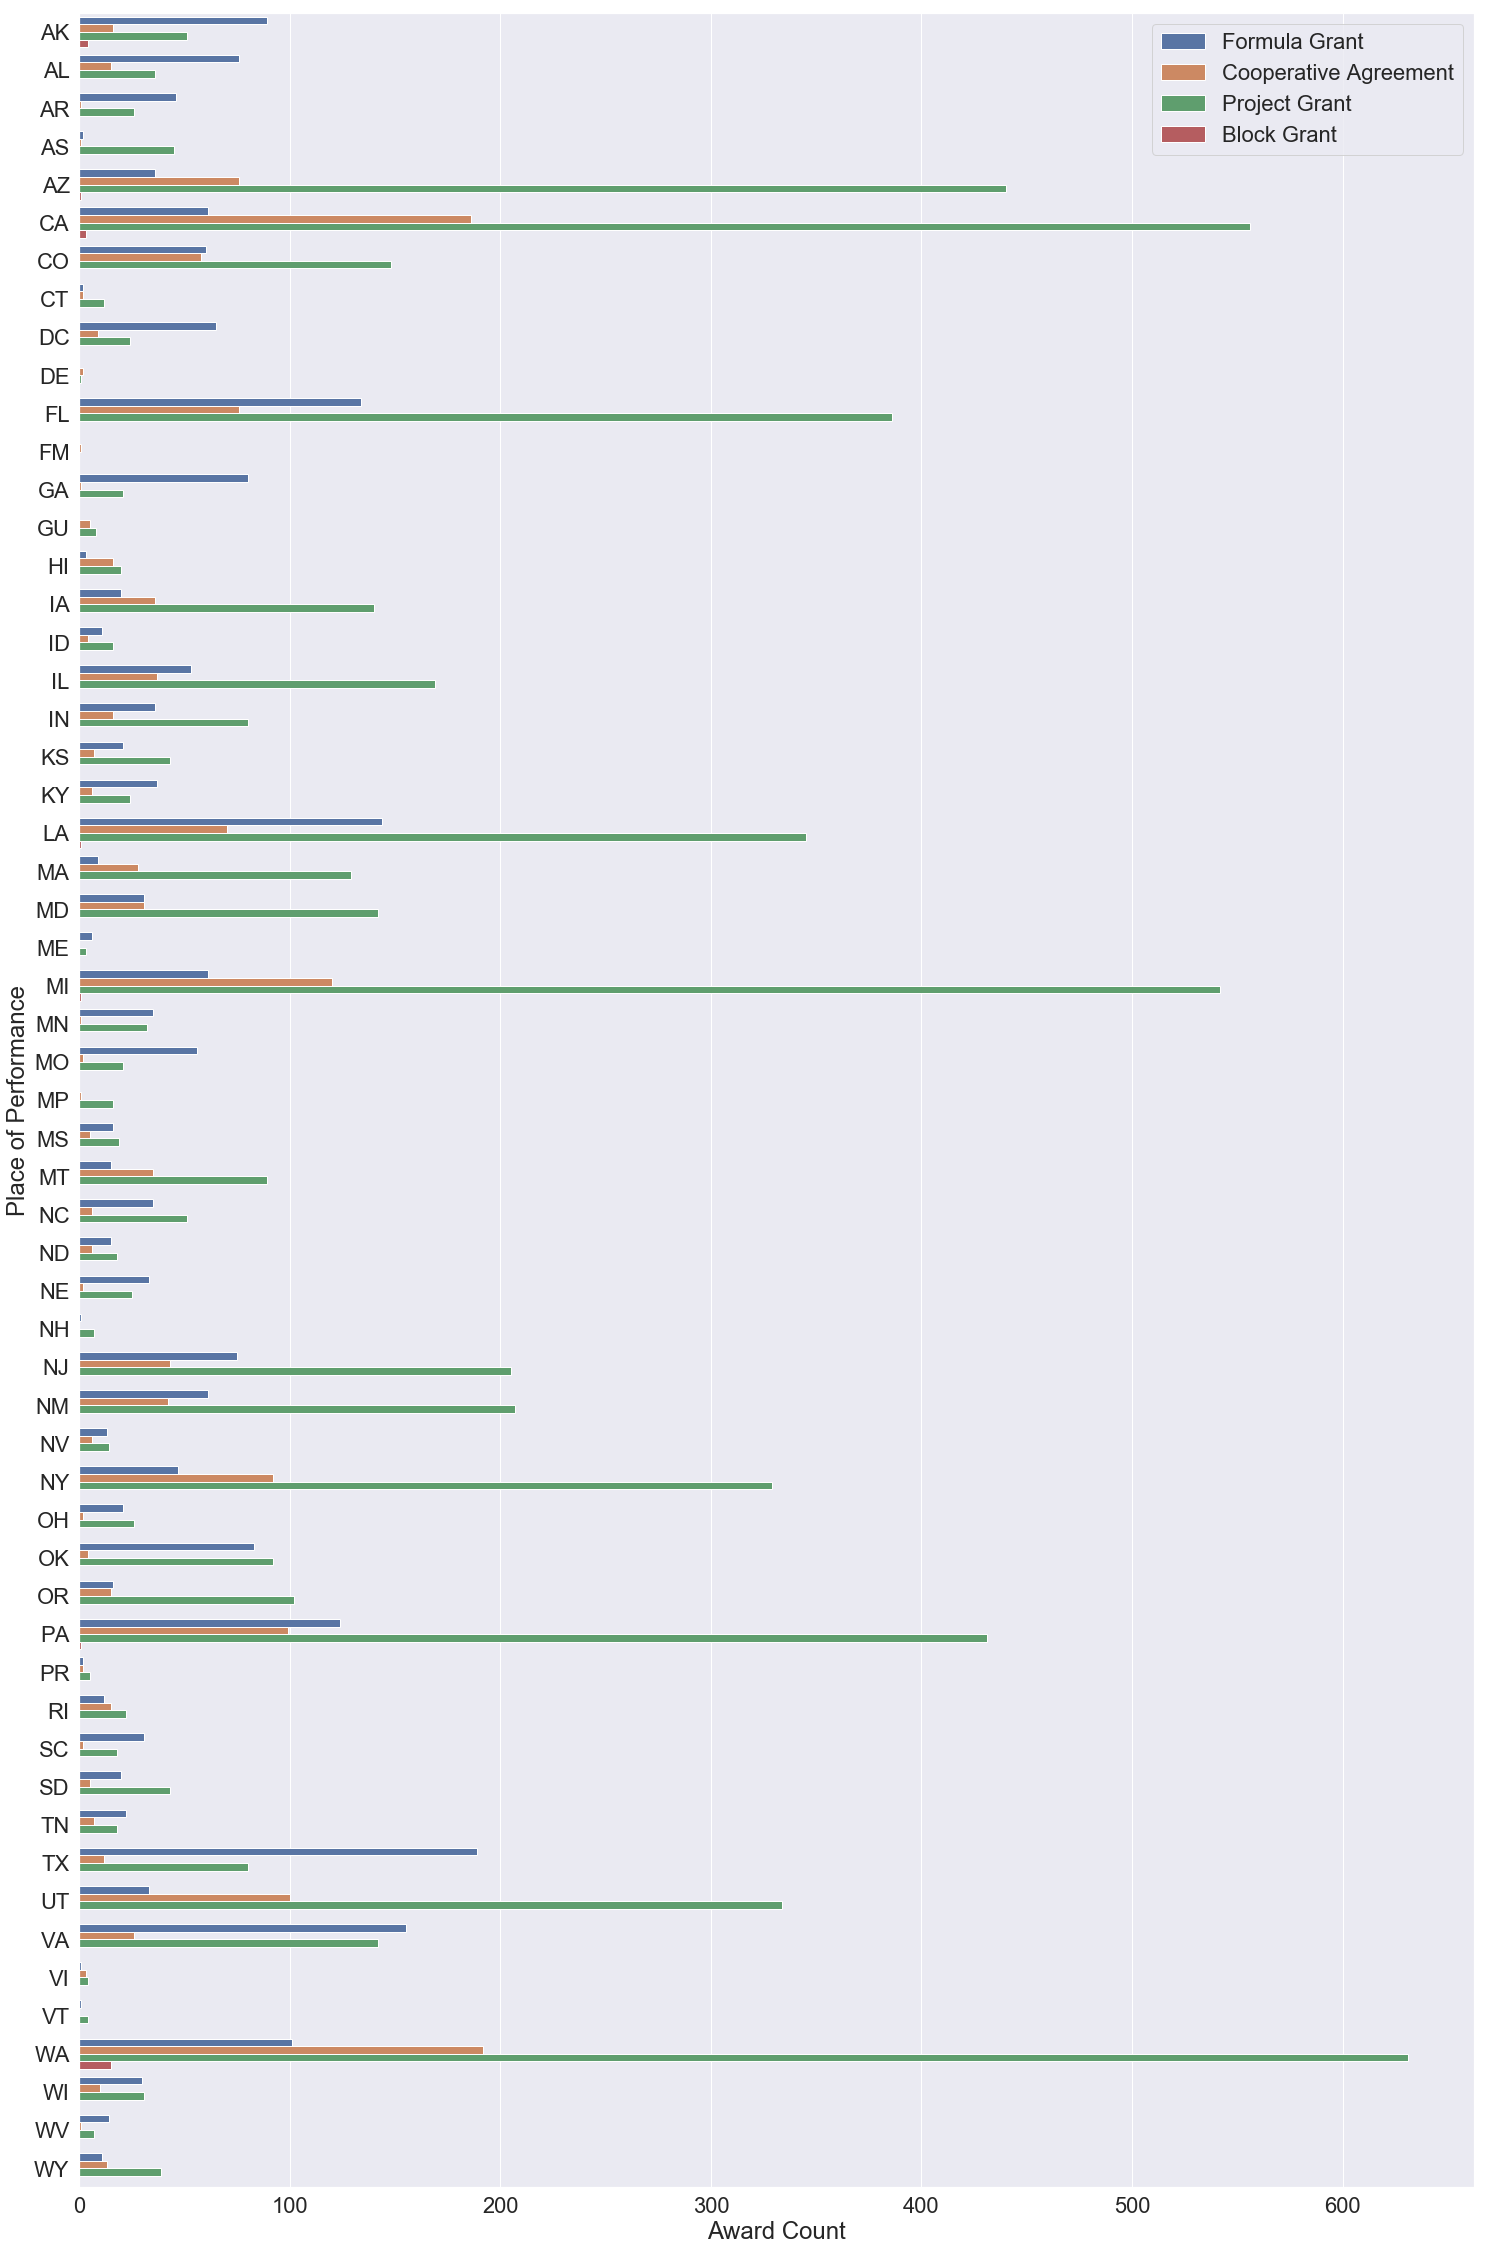

In [6]:
import seaborn as sns

# Set grid scale and font-size
sns.set(style="darkgrid",font_scale=2)

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(25, 40))

# Count of Awards by State broken down by Type of Grant
ax = sns.countplot(y="place_of_performance_state_code", 
                   hue="type_description",
                   data=grants)

# Set Labels
ax.set(xlabel='Award Count', ylabel='Place of Performance')
ax.legend()

plt.show()

# And now Bokeh!
<img src="http://bokeh.pydata.org/en/latest/_static/images/logo.png"
     align="right"
     width="10%"
     alt="Bokeh logo\">
Bokeh is an interactive Visualization Library that makes it easy to create rich visualizations without a single line of D3! Their [roadmap](http://bokehplots.com/pages/roadmap.html) includes integration with [Altair](https://altair-viz.github.io/) which is another viz library created by Jake Vanderplas and also their JS Code migration to [Typescript](https://www.typescriptlang.org/).

## Award Amounts by Performance State example 
Inspired by Texas Unemployment Rate, http://bokeh.pydata.org/en/0.11.1/docs/gallery/texas.html

In [10]:
from bokeh.io import push_notebook, show, output_notebook
from bokeh.models import (
    ColumnDataSource,
    HoverTool,
    LogColorMapper
)
from bokeh.plotting import figure
from bokeh.sampledata.us_states import data as states

output_notebook()

Loading BokehJS ...

### Get the amounts by State for total Awards from previously loaded dataframe

In [12]:
state_amounts = pdf.groupby(pdf.place_of_performance_state_code).federal_action_obligation.sum()

## Bokeh provide sample data which is great and makes it easy to join to State awards
This is cool because we don't have Lat & Long in USA Spending Data

In [13]:
state_xs = [state["lons"] for state in states.values()]
state_ys = [state["lats"] for state in states.values()]

state_names = [state['name'] for state in states.values()]
state_obligations = [state_amounts[state_id] for state_id in states]

# colorblind-safe palette courtesy of http://colorbrewer2.org
colors = ["#edf8fb", "#ccece6", "#99d8c9", "#66c2a4", "#2ca25f", "#006d2c"]
state_colors = []
# creating index for choropleth using log of Total Obligation
for state_id in states:
    try:
        obligation = state_amounts[state_id]
        if obligation >= 0:
            idx = int(np.log(obligation)/4)
        else:
            idx = 1
        state_colors.append(colors[idx])
    except KeyError:
        state_colors.append("black")
        
source = ColumnDataSource(data=dict(
    x=state_xs,
    y=state_ys,
    name=state_names,
    obligation=state_obligations,
    color=state_colors
))

## Now you can customize the visualization components for amazing User Experience
[All the Plot Tools!](http://bokeh.pydata.org/en/latest/docs/user_guide/tools.html)

In [14]:
TOOLS = "pan,wheel_zoom,box_zoom,reset,hover,save"

p = figure(
    title="Federal Contract Award Obligations, 2017", tools=TOOLS, toolbar_location="left",
    x_axis_location=None, y_axis_location=None, plot_width=2000, plot_height=500
)

p.grid.grid_line_color = None

p.patches('x', 'y', source=source,
          fill_color='color', fill_alpha=0.7,
          line_color="white", line_width=0.5)

hover = p.select_one(HoverTool)
hover.point_policy = "follow_mouse"

hover.tooltips = [
    ("Name", "@name"),
    ("Total Contract Award Obligation", "$@obligation{1,}")
]

show(p, notebook_handle=True)